In [1]:
# For Mounting Google Drive when using Colab
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

%cd gdrive/MyDrive/h23q-data

! ls

Mounted at /content/gdrive/


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
abnormal_files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('mal.csv')]

In [7]:
selected_feature_names=['src_port', 'protocol', 'flow_duration', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std',
       'fwd_header_len', 'bwd_header_len', 'flow_iat_max',
       'fwd_iat_tot', 'fwd_iat_max', 'down_up_ratio',
        'idle_max', 'idle_mean', 'idle_std',
       'fwd_pkts_b_avg', 'bwd_byts_b_avg', 'bwd_pkts_b_avg',
       'bwd_blk_rate_avg']

In [8]:
class_labels = {
    '1': 0,
    '2': 1,
    '3': 2,
    '4': 3,
    '5': 4,
    # '6': ,
    '7': 5,
    '8': 6,
    '9': 7,
    '10': 8,
}

In [9]:
dataframes = []
labels = []

for file in abnormal_files:
    label = class_labels[(file.split('-')[0])]  # Extract label from file name
    df = pd.read_csv(file)
    df = df[selected_feature_names]
    dataframes.append(df)
    labels.extend([label]*len(df))

# Step 2: Combine data from all CSV files
combined_df = pd.concat(dataframes)
y = labels

In [10]:
combined_df.shape

(62021, 23)

In [11]:
len(y)

62021

In [12]:
from collections import Counter
# Count the occurrences of each value
value_counts = Counter(y)

# Print the counts
for value, count in value_counts.items():
    print(f"{value}: {count}")

0: 8393
1: 14250
2: 2199
3: 2234
4: 1342
5: 6
6: 3250
8: 14675
7: 15672


In [13]:
Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_df, y, test_size=0.2, random_state=42)

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Train K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate classifiers
classifiers = {
    'Naive Bayes': nb_classifier,
    'KNN': knn_classifier,
    'SVM': svm_classifier,
    'Random Forest': rf_classifier,
}

for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    print(f"Classification report for {name}:")
    print(classification_report(y_test, y_pred))

Classification report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.50      0.62      1644
           1       0.52      0.99      0.68      2811
           2       0.33      0.13      0.18       448
           3       0.32      0.17      0.22       446
           4       0.25      0.41      0.31       244
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00       655
           7       0.64      0.47      0.55      3192
           8       1.00      0.97      0.98      2962

    accuracy                           0.66     12405
   macro avg       0.54      0.52      0.51     12405
weighted avg       0.66      0.66      0.63     12405

Classification report for KNN:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1644
           1       0.99      1.00      0.99      2811
           2       0.61      0.43      0.50       448
        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1644
           1       1.00      1.00      1.00      2811
           2       0.87      0.93      0.90       448
           3       0.89      0.87      0.88       446
           4       0.84      0.83      0.84       244
           5       1.00      1.00      1.00         3
           6       0.99      1.00      0.99       655
           7       1.00      1.00      1.00      3192
           8       1.00      1.00      1.00      2962

    accuracy                           0.99     12405
   macro avg       0.95      0.96      0.95     12405
weighted avg       0.99      0.99      0.99     12405



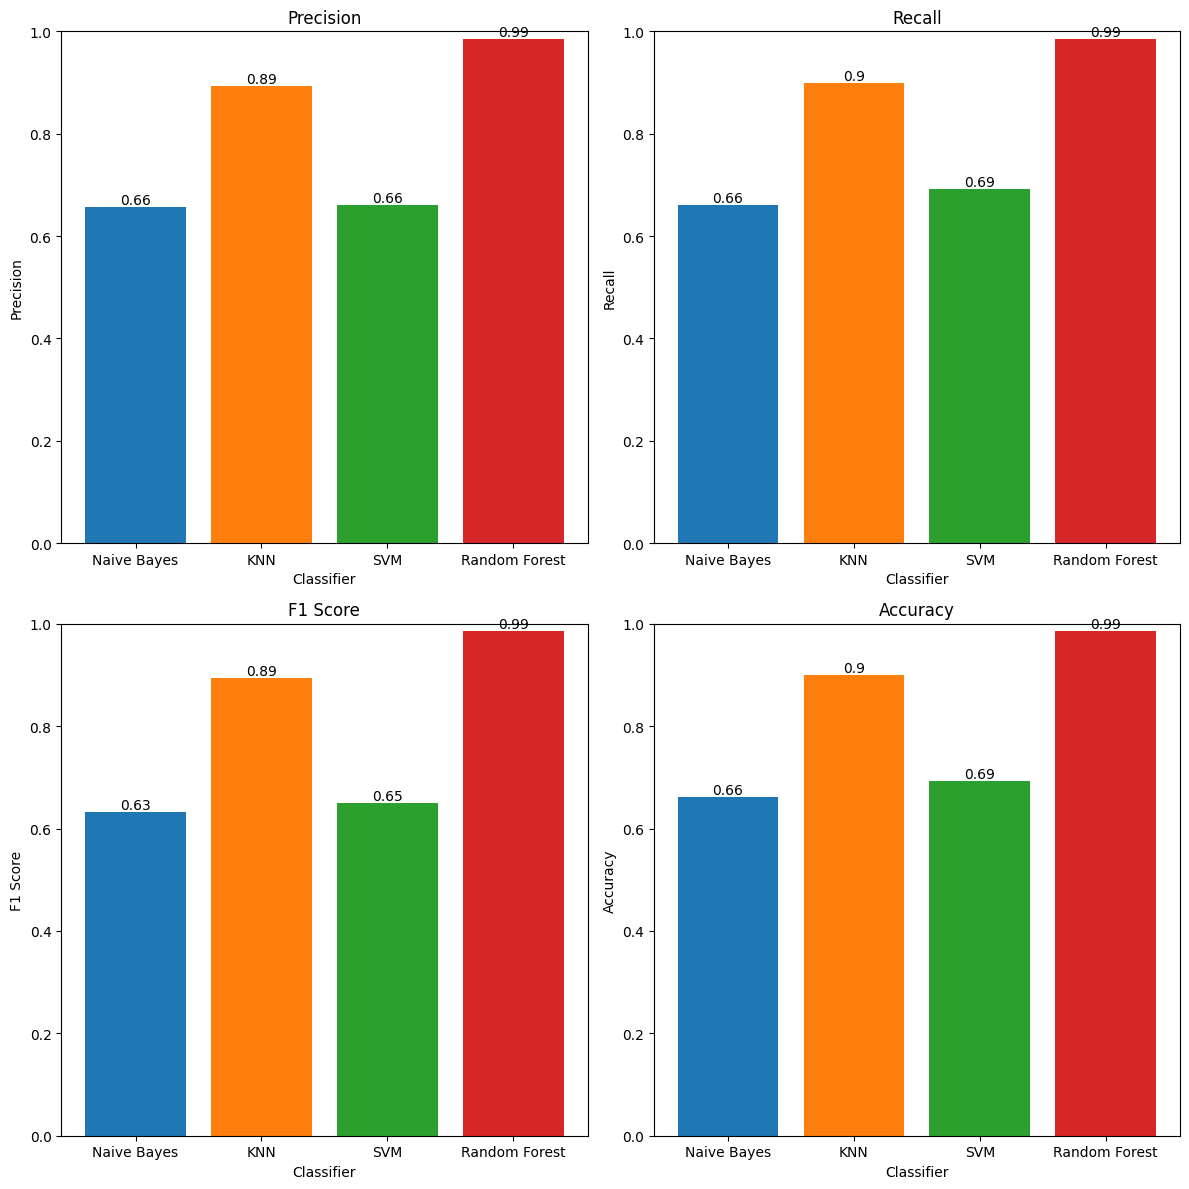

In [19]:
precision_scores = {}
recall_scores = {}
f1_scores = {}
accuracy_scores = {}

for name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores[name] = report['weighted avg']['precision']
    recall_scores[name] = report['weighted avg']['recall']
    f1_scores[name] = report['weighted avg']['f1-score']
    accuracy_scores[name] = report['accuracy']


# Step 4: Plot graphs
plt.figure(figsize=(12, 12))

# Define colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create subplots
for i, metric in enumerate(['Precision', 'Recall', 'F1 Score', 'Accuracy']):
    plt.subplot(2, 2, i + 1)
    values = [precision_scores, recall_scores, f1_scores, accuracy_scores][i]
    bars = plt.bar(np.arange(len(classifiers)), values.values(), color=colors)

    # Label the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

    plt.title(metric)
    plt.xlabel('Classifier')
    plt.ylabel(metric)
    plt.xticks(np.arange(len(classifiers)), values.keys())
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()